# import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# load data

In [ ]:
df = pd.read_csv('all_items_no_duplicate.csv')
# view
df.head(10)

,pid,rating_average,reviews_count,item,price,Công ty phát hành,Ngày xuất bản,Kích thước,Loại bìa,Số trang,category
0,304497.0,4.2,327,Hôm Nay Tôi Thất Tình,68700.0,Skybooks,2017-01-04 00:00:00,13 x 20.5 cm,Bìa mềm,200.0,sách tình cảm
1,339724.0,4.5,15,Người Đàn Bà Đang Yêu (Tiểu Thuyết),148000.0,Liên Việt,2011-06-03 00:00:00,16x24 cm,Bìa mềm,644.0,sách tiểu thuyết
2,341382.0,4.5,11,100 Ý Tưởng Viết Quảng Cáo Tuyệt Hay,89000.0,NXB Trẻ,2011-09-15 00:00:00,13 x 20.5 cm,Bìa mềm,318.0,sách viến tưởng
3,361889.0,0.0,0,60 Món Ăn Được Ưa Thích - Món Thịt Heo,24600.0,Công Ty TNHH Văn Hóa Việt Thư,2010-09-30 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
4,362055.0,4.7,14,"Nấu Ăn Ngon - Các Món Kho, Nướng",24600.0,Công Ty TNHH Văn Hóa Việt Thư,2011-12-30 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
5,362140.0,4.4,5,Món Ăn Hàng Ngày,24300.0,Công Ty TNHH Văn Hóa Việt Thư,2012-01-15 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
6,365991.0,4.8,19,Bộ Sách Phát Triển Trí Tuệ Trẻ Em (10 Cuốn) (Tái Bản),75500.0,Công Ty Cổ Phần Văn Hóa Đông A,2011-03-15 00:00:00,Đang cập nhật,Bìa mềm,160.0,sách trẻ em
7,366108.0,4.6,56,Tủ Sách Bách Khoa Tri Thức Trẻ Em - Bí Ẩn Của Đại Dương (Tái Bản),63000.0,Huy Hoàng Bookstore,2012-10-15 00:00:00,20.5 x 27 cm,Bìa cứng,60.0,sách trẻ em
8,374106.0,4.7,59,Truyện Tranh Tuổi Thần Tiên (Bộ Túi 8 Cuốn),62000.0,Minh Long,2013-07-25 07:00:00,19 x 27 cm,NaN,NaN,truyện tranh
9,381234.0,4.7,1087,Cuốn Sách Hoàn Hảo Về Ngôn Ngữ Cơ Thể - Body Language (Tái Bản),159000.0,Nhân Trí Việt,2014-08-03 00:00:00,14 x 21.5 cm,Bìa mềm,456.0,sách


In [ ]:
# save a original copy
df_original = df.copy()

In [ ]:
from pprint import pprint

df.rename(columns={
    'Công ty phát hành': 'publisher',
    'Ngày xuất bản': 'publish_date',
    'Kích thước': 'size',
    'Loại bìa': 'cover_type',
    'Số trang': 'num_pages',
    'item': 'book_name'
}, inplace=True)

# General Information

In [ ]:
# change column price to last colume and drop pid colume
cols = df.columns.tolist()
price_idx = cols.index('price')
cols = cols[1:price_idx] + cols[price_idx+1:] + [cols[price_idx]]
df = df[cols]
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014 entries, 0 to 2013
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  2014 non-null   float64
 1   reviews_count   2014 non-null   int64  
 2   book_name       2014 non-null   object 
 3   publisher       2014 non-null   object 
 4   publish_date    891 non-null    object 
 5   size            670 non-null    object 
 6   cover_type      1465 non-null   object 
 7   num_pages       1151 non-null   object 
 8   category        2014 non-null   object 
 9   price           2014 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 157.5+ KB


Hầu hết các đặc trưng đề có dạng Object, chỉ có 2 đặc trưng là có dạng số (rating_average, reviews_count). Đây đều là những features thuộc dạng liên tục (coninuous)

In [ ]:
# number of total examples
print('Total examples: ', len(df))

Total examples:  2014


In [ ]:
df.describe()

,rating_average,reviews_count,price
count,2014.000000,2014.000000,2.014000e+03
mean,1.436197,117.590367,1.596704e+05
std,2.196204,524.472192,2.104356e+05
min,0.000000,0.000000,8.600000e+03
25%,0.000000,0.000000,6.795500e+04
50%,0.000000,0.000000,1.190000e+05
75%,4.700000,7.750000,1.930375e+05
max,5.000000,11616.000000,5.575000e+06


Ta thấy rating_average và reviews_count đều có đầy đủ cho tất cả các items. Số sao đánh giá trung bình cho 1 quyển sách là xấp xỉ 1.43, tuy nhiên độ lệch chuẩn lại khá cao (2.19) => chất lượng của những cuốn sách là không đồng đều. Đặc trưng reviews_count cũng thể hiện tương tự với độ lệch chuẩn rất lớn. Có tới tận 50% cuốn sách có rating_average và reviews_count nhỏ hơn 0, trong khi có tới 25% cuốn sách có rating_average > 4.7 (gần với mức tuyệt đối là 5). Điều này một lần nữa cho thấy sự đánh giá của người dùng cho các cuốn sách là rất không đồng đều. Chỉ có một số sách được đặc biệt yêu thích, còn lại gần như không gây hứng thú cho người đọc

In [ ]:
# See if there is any null in our data
null_info = pd.DataFrame({'Null count': df.isnull().sum(), 'Null ratio': df.isnull().sum()/len(df)})
null_info.drop('price', inplace=True)
null_info.sort_values(by='Null ratio', ascending=False, inplace=True)
null_info

,Null count,Null ratio
size,1344,0.667329
publish_date,1123,0.557597
num_pages,863,0.428500
cover_type,549,0.272592
rating_average,0,0.000000
reviews_count,0,0.000000
book_name,0,0.000000
publisher,0,0.000000
category,0,0.000000


Các trường ngày xuất bản, kích thước, loại bìa, số trang có khá nhiều giá trị null, đặc biệt trường ngày xuất bản và kích thước có đến hơn một nửa số item bị thiếu

Text(0.5, 1.0, 'Number of null values for each column / Total Items: 2014')

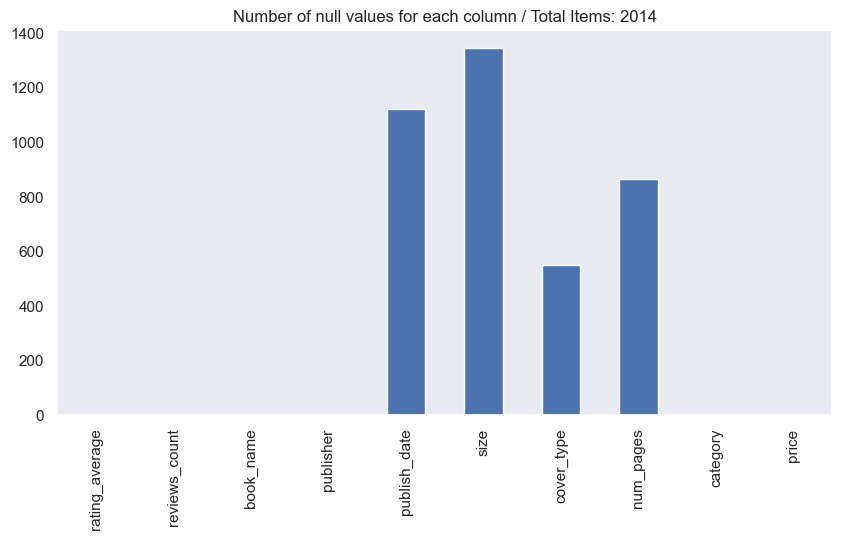

In [ ]:
df.isnull().sum().plot(kind='bar', figsize=(10, 5))
plt.title(f'Number of null values for each column / Total Items: {len(df)}')

# Split train val test

Trước khi tìm hiểu quá sâu về dữ liệu, chúng ta sẽ chia tập train val test trước, tránh tìm hiểu quá sâu và dữ liệu test

In [ ]:
# split data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 261 to 1126
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  1611 non-null   float64
 1   reviews_count   1611 non-null   int64  
 2   book_name       1611 non-null   object 
 3   publisher       1611 non-null   object 
 4   publish_date    708 non-null    object 
 5   size            545 non-null    object 
 6   cover_type      1169 non-null   object 
 7   num_pages       929 non-null    object 
 8   category        1611 non-null   object 
 9   price           1611 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 138.4+ KB


In [ ]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 1198 to 921
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating_average  403 non-null    float64
 1   reviews_count   403 non-null    int64  
 2   book_name       403 non-null    object 
 3   publisher       403 non-null    object 
 4   publish_date    183 non-null    object 
 5   size            125 non-null    object 
 6   cover_type      296 non-null    object 
 7   num_pages       222 non-null    object 
 8   category        403 non-null    object 
 9   price           403 non-null    float64
dtypes: float64(2), int64(1), object(7)
memory usage: 34.6+ KB


# Feature-specific Information

Kể từ giờ, tất cả những phân tích dữ liệu đều được thực hiện trên tập train

## rating_average

In [ ]:
train['rating_average']

261     0.0
746     0.0
1380    0.0
240     4.8
1644    4.9
       ... 
1130    0.0
1294    0.0
860     4.6
1459    0.0
1126    4.9
Name: rating_average, Length: 1611, dtype: float64

Text(0.5, 1.0, 'Rating Average Distribution')

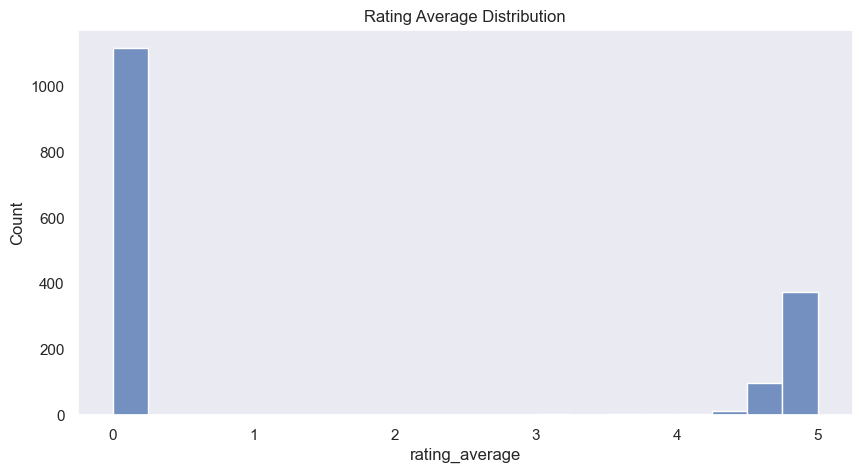

In [ ]:
# hist plot for rating_average distributino
plt.figure(figsize=(10, 5))
sns.histplot(train['rating_average'], bins=20, kde=False)
plt.title('Rating Average Distribution')

Hầu hết là các nhận xét là rất không hài lòng (0 sao) hoặc hài lòng - rất hài lòng (4-5 sao). Gần như không có các nhận xét trung bình. Số nhận xét rất không hài lòng chiếm đa số (gần 60%)

Text(0.5, 1.0, 'Rating Average vs Price')

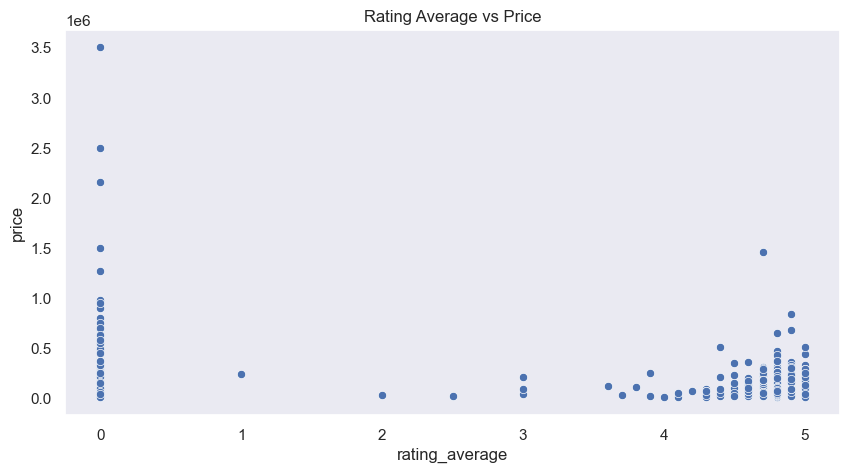

In [ ]:
# scatter plot between rating_average and price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train['rating_average'], y=train['price'])
plt.title('Rating Average vs Price')

Có những cuốn sách dù rating thấp nhưng vẫn có giá cao hơn các cuốn sách có rating cao => không có mối tương quan rõ ràng giữa rating count và price

## reviews_count

In [ ]:
train.reviews_count

261       0
746       0
1380      0
240     303
1644     37
       ... 
1130      0
1294      0
860      22
1459      0
1126    342
Name: reviews_count, Length: 1611, dtype: int64

<AxesSubplot:>

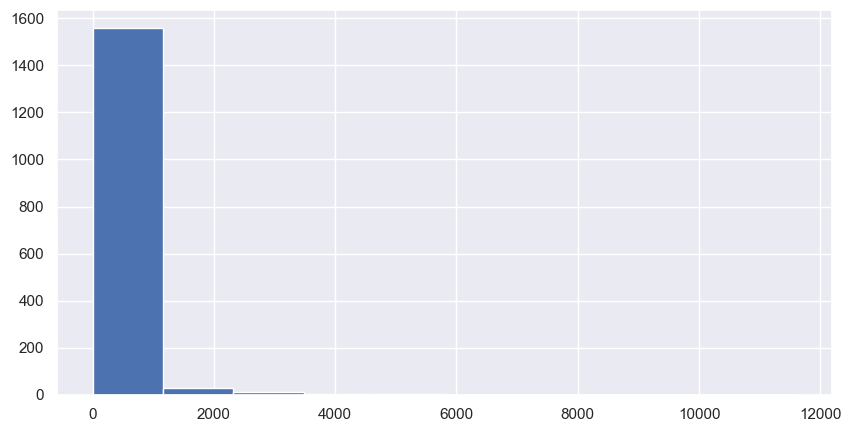

In [ ]:
plt.figure(figsize=(10, 5))
train.reviews_count.hist()

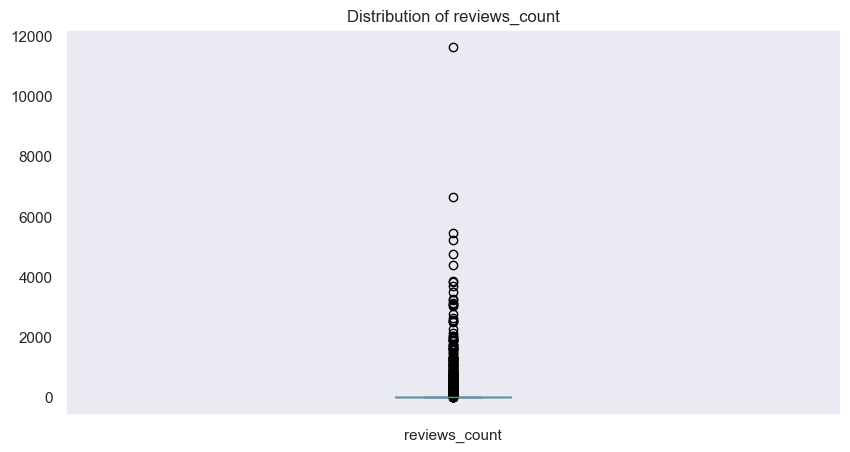

In [ ]:
plt.figure(figsize=(10, 5))
df['reviews_count'].plot.box()
plt.title('Distribution of reviews_count')
plt.show()

Hầu hết các cuốn sách đều có ít hơn 1000 reviews. Có một vài outlier có số review rất lớn.
Ta sẽ xem xét quan hệ giữa rating_average và reviews_count

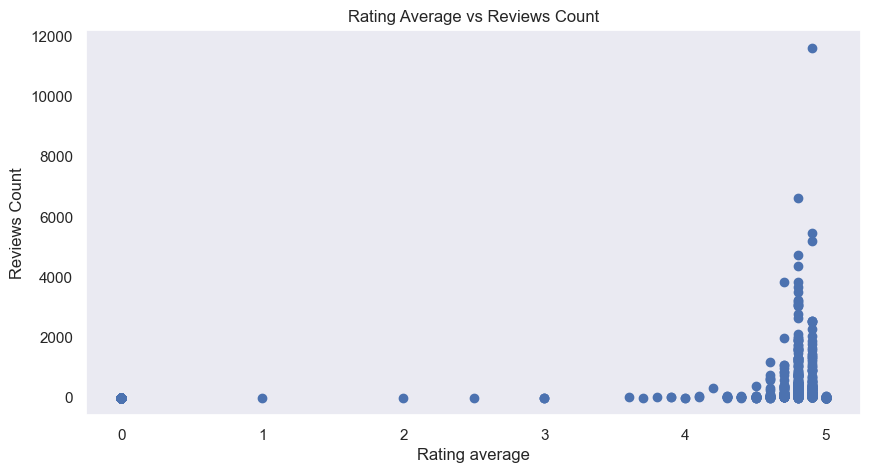

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df['rating_average'], y=df['reviews_count'])
plt.xlabel('Rating average')
plt.ylabel('Reviews Count')
plt.title('Rating Average vs Reviews Count')
plt.show()


Hầu hết cuốn sách nếu có rating average cao hơn thì sẽ có số  lượng reviews lớn hơn

Text(0.5, 1.0, 'Reviews Count vs Price')

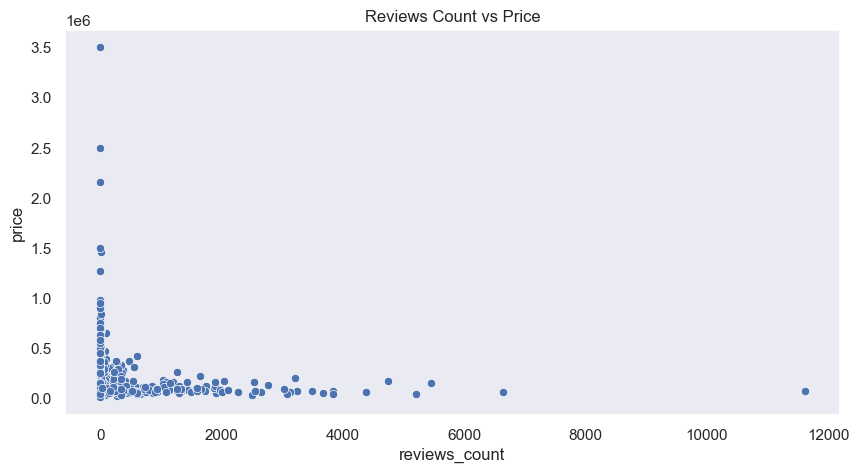

In [ ]:
# scatter plot between reviews_count and price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train['reviews_count'], y=train['price'])
plt.title('Reviews Count vs Price')

Tương tự như rating_average, những cuốn sách có ít reviews hơn, ít phổ biến hơn vẫn có thể có giá cao hơn những cuốn sách ăn khách => chất lượng cuốn sách không phải là yếu tố quan trọng quyết định đến giá. Hoặc có thể những cuốn sách có giá quá cao sẽ khó tiếp cận với người dùng => ít review và rating hơn

## book_name

In [ ]:
train.book_name

261                                                                            Combo 2 cuốn sách văn học hay nhất: Người Đua Diều + Chiến Binh Cầu Vồng Tặng sổ tay VDT
746                                                                                                                                Bộ truyện tranh Cổ Oai ơi! Tập 4-5-6
1380                                 Rich habits, poor habits: Sự khác biệt giữa người giàu và người nghèo_ Sách_ Bizbooks_ Sách phát triển bản thân_ Sách hay mỗi ngày
240                                                                                                                           Kinh Doanh - Khái Lược Những Tư Tưởng Lớn
1644                                                           Nghệ thuật tư duy dựa trên dữ liệu - Để ra quyết điịnh thông minh hơn trong một thê giới không chắc chắn
                                                                                     ...                                                                        

In [ ]:
# values count for book_name
train.book_name.value_counts(dropna=False)

Tạp chí ELLE tháng 10/2022                                                                   3
Sách - Tiểu Thuyết - Phát Súng Chính Nghĩa (Bộ Hồ Sơ Lửa) - Lại Văn Long                     2
Combo Đạo Tình (Bộ 2 tập - Tái bản 2018) Tặng kèm bookmark yêu thương                        2
Sách - Tiểu Thuyết - Hồng Nhan Sương Khói (Bộ Hồ Sơ Lửa) - Lại Văn Long                      2
Món Ăn Hàng Ngày                                                                             2
                                                                                            ..
Thiên quan tứ phúc - Tập 5 (Tiểu thuyết đam mỹ) -  Tặng kèm 1 bookmark 2 mặt                 1
Sách giáo viên Tin học lớp 10 (Bộ sách Cánh Diều)                                            1
Sách: Tư Duy Như Một Nhà Khoa Học Tên Lửa                                                    1
Tâm Lý Học Biểu Cảm                                                                          1
Combo 2 Cuốn: Bạn Không Thông Minh Lắm Đâu +  Bạn 

In [ ]:
print('Book names with 3 occurences: %s', train.book_name.value_counts()[train.book_name.value_counts() == 3].count())
print('Book names with 2 occurences: %s', train.book_name.value_counts()[train.book_name.value_counts() == 2].count())
print('Book names with 1 occurences: %s', train.book_name.value_counts()[train.book_name.value_counts() == 1].count())

Book names with 3 occurences: %s 1
Book names with 2 occurences: %s 11
Book names with 1 occurences: %s 1586


Hầu hết các cuốn sách là không trùng lặp

In [ ]:
# see null values for book_name
train.book_name.isnull().sum()

0

no null values for this column


Text(0.5, 1.0, 'Distribution of number of words of book_name')

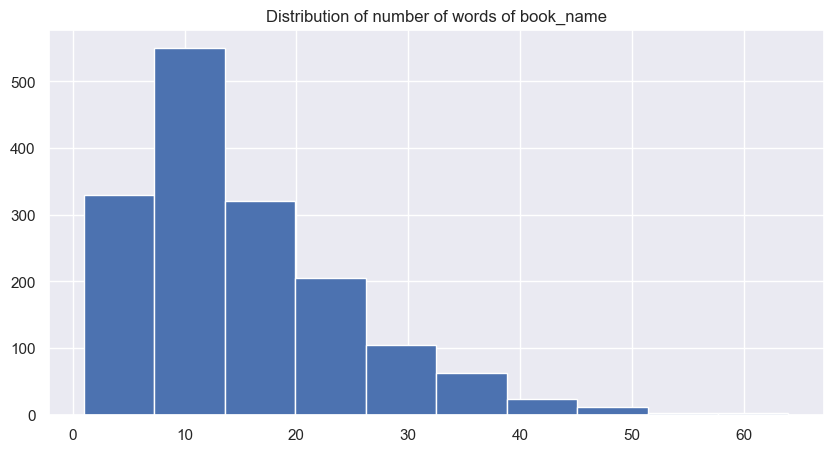

In [ ]:
# distribution of number of word of book_name
plt.figure(figsize=(10, 5))
book_name_words = train.book_name.str.split()
# remove element that has len < 1 in book_name_words (. , -)
book_name_words = book_name_words.apply(lambda x: [i for i in x if len(i) > 1])
book_name_words.apply(len).hist()
plt.title('Distribution of number of words of book_name')

Hầu hết tên sách có độ dài nhỏ hơn 20 từ. Cá biệt có một số cuốn sách có tên rất dài (60 từ)

In [ ]:
# see book_name that has length > 60
pd.set_option('display.max_colwidth', None)
book_name_words[book_name_words.apply(len) > 60].apply(lambda x: ' '.join(x))

299                                     Bộ sách Thiền sư Thích Nhất Hạnh Phần 1: Gieo Trồng Hạnh Phúc Tìm Bình Yên Trong Gia Đình Muốn An Được An Tĩnh Lặng Đạo Phật Ngày Nay Con Đường Chuyển Hóa Hướng Đi Của Đạo Bụt Cho Hòa Bình Và Sinh Môi Tay Thầy Trong Tay Con Bụt Là Hình Hài Bụt Là Tâm Thức Thiền Sư Khương Tăng Hội
783    Combo sách Siêu Dễ Nhớ Chiết Tự 2102 Từ Tiếng Trung Thông Dụng Nhất Bá Đạo Hack Não Tam Ngữ (Kèm cách nhớ, ví dụ, tiếng Anh, tiêng Trung giản thể, tiếng Trung phồn thể, tiếng bồi, bính âm Pinyin, tiếng Việt &amp; hình ảnh hướng dẫn viết từng nét) 1001 Bức thư viết cho tương lai (có Audio do người Trung Quốc đọc)
Name: book_name, dtype: object

## publisher

In [ ]:
train.publisher

261                                Nhã Nam
746     Công ty TNHH Phòng khám Happy Baby
1380                              BIZBOOKS
240         Công Ty Cổ Phần Văn Hóa Đông A
1644                               NXB Trẻ
                       ...                
1130                               Đinh Tị
1294                            Alphabooks
860                                Nhã Nam
1459            Pháp luật Sài Gòn - Hà Nội
1126                            Read Books
Name: publisher, Length: 1611, dtype: object

In [ ]:
# count null value
train.publisher.isnull().sum()

0

In [ ]:
train.publisher.value_counts()

Nhã Nam                               158
Alphabooks                             87
NXB Trẻ                                80
Nhiều công ty phát hành                68
Đinh Tị                                58
                                     ... 
iBooks                                  1
CÔNG TY TNHH WE UP                      1
Công ty TNHH Rbooks                     1
CÔNG TY TNHH PHAN LỆ &amp; FRIENDS      1
Messy Books                             1
Name: publisher, Length: 271, dtype: int64

Có tất cả 271 nhà phát hành sách khác nhau

Text(0.5, 1.0, 'Top 10 most common publisher')

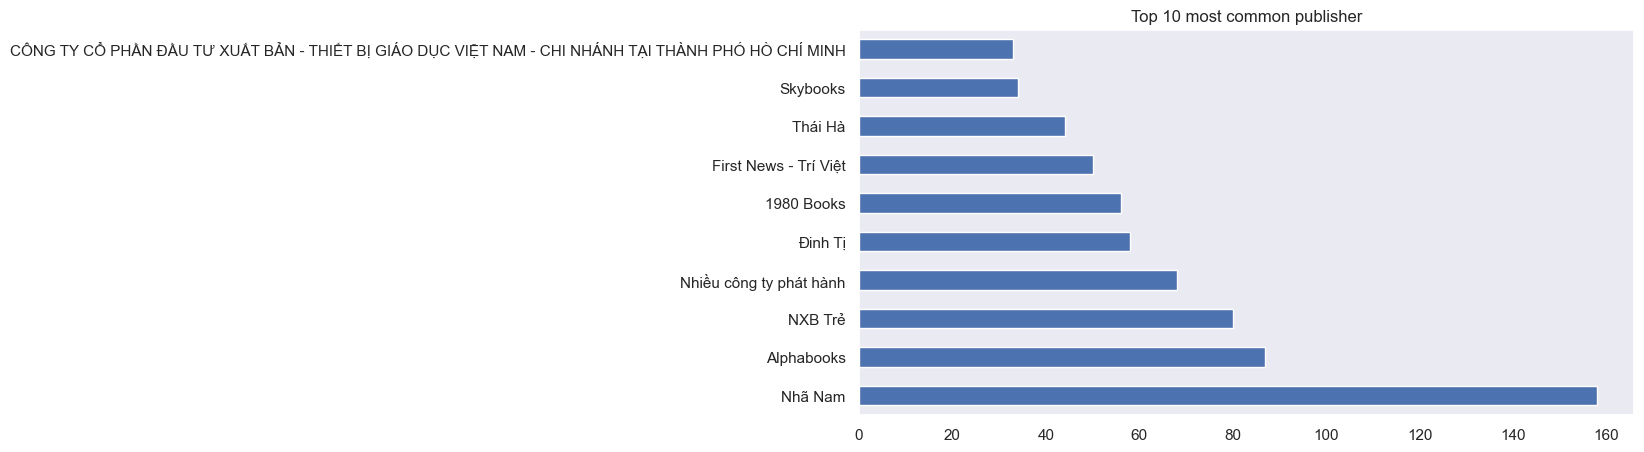

In [ ]:
# plot number of occurences of top-10 most common publisher
plt.figure(figsize=(10, 5))
train.publisher.value_counts()[:10].plot(kind='barh')
plt.title('Top 10 most common publisher')

Nhã Nam là nhà phát hành nhiều sách nhất, tiếp theo đó là các thương nhà phát hành nổi tiếng khác như Alphabooks, NXB Trẻ. Có thể thấy đây đều là những NXB chuyên phát hành sách hướng đến người trẻ => hợp lý vì đây là sách được bán trên các sàn thương mại điện tử, dễ tiếp cận với đối tượng khách hàng trẻ hơn

Text(0.5, 1.0, 'Publisher with highest average price')

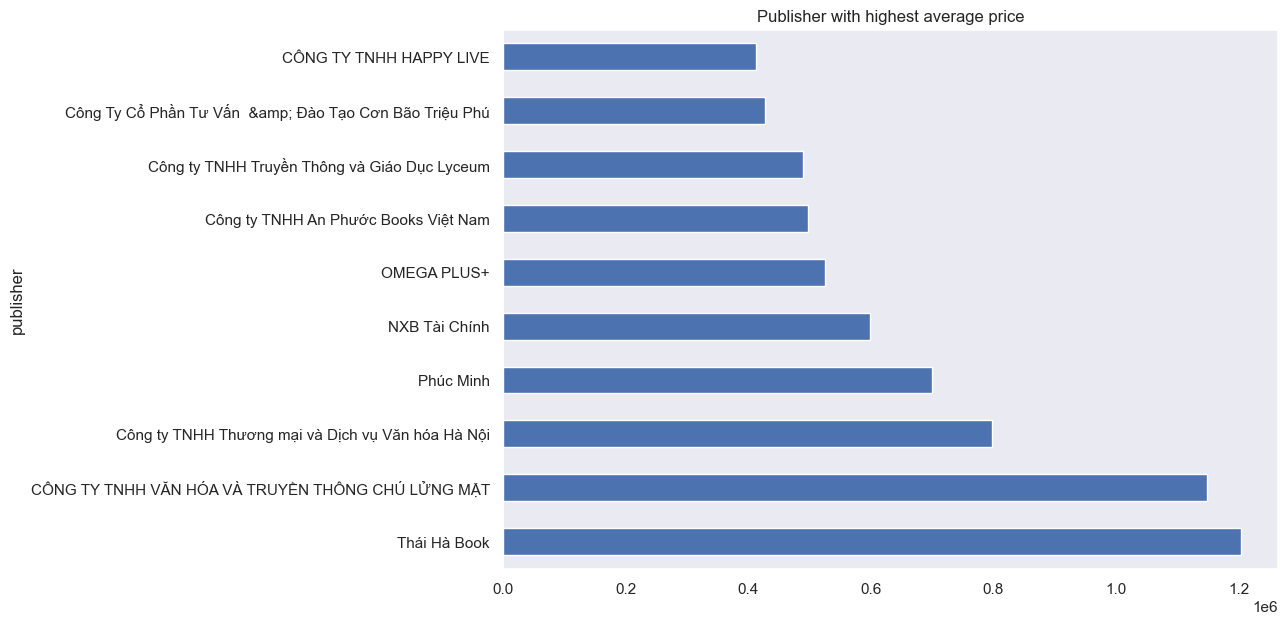

In [ ]:
# plot the above result
plt.figure(figsize=(10, 7))
train.groupby('publisher').price.mean().sort_values(ascending=False)[:10].plot(kind='barh')
plt.title('Publisher with highest average price')

Những NXB phát hành sách giá cao thường không nằm trong top những NXB có nhiều sách nhất

## publish_date

In [ ]:
train.publish_date

261                     NaN
746     2020-09-04 10:42:15
1380                    NaN
240     2019-06-01 00:00:00
1644    2022-07-11 00:00:00
               ...         
1130                    NaN
1294                    NaN
860     2021-01-01 00:00:00
1459                    NaN
1126    2021-07-01 00:00:00
Name: publish_date, Length: 1611, dtype: object

In [ ]:
# remove time in not null publish_date
train.publish_date = train.publish_date.apply(lambda x: x.split(' ')[0] if type(x) == str else x)
train.publish_date

261            NaN
746     2020-09-04
1380           NaN
240     2019-06-01
1644    2022-07-11
           ...    
1130           NaN
1294           NaN
860     2021-01-01
1459           NaN
1126    2021-07-01
Name: publish_date, Length: 1611, dtype: object

Text(0.5, 1.0, 'Distribution of publication by year')

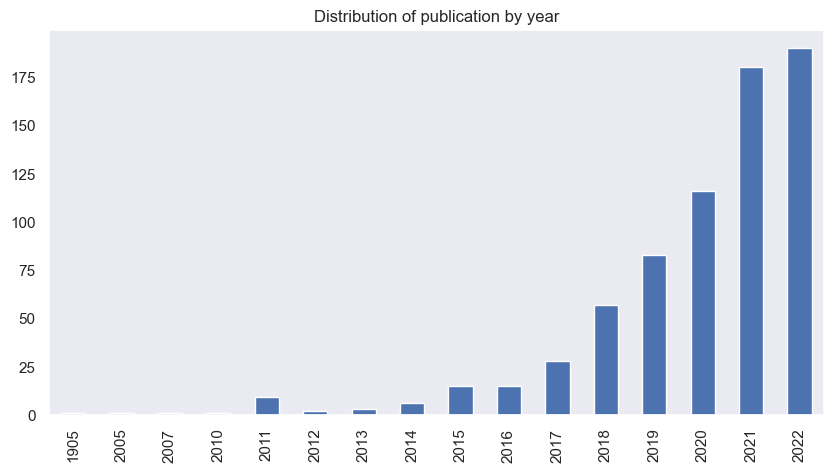

In [ ]:
# distribution of publication by year
train.publish_date.apply(lambda x: x.split('-')[0] if type(x)==str else x).value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of publication by year')

Hầu hết sách được xuất bản trong vòng 5 năm trở lại đây. 

Text(0.5, 0, 'Publish year')

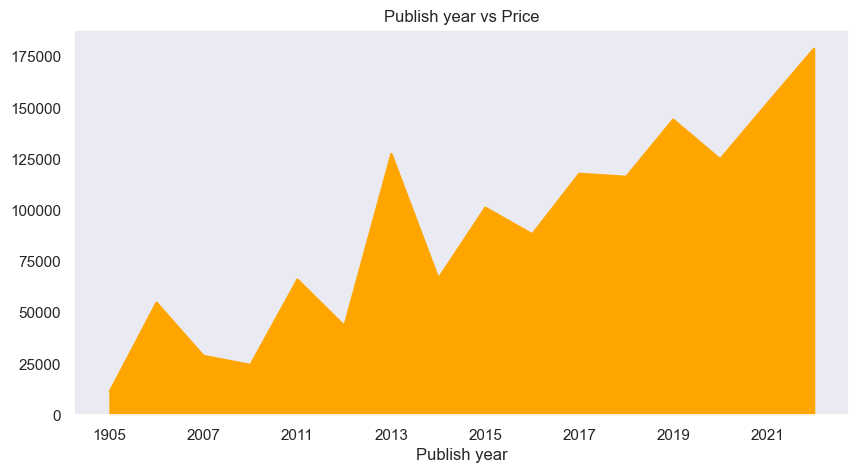

In [ ]:
plt.figure(figsize=(10, 5))
train.groupby(train.publish_date.apply(lambda x: x.split('-')[0] if type(x)==str else x)).price.mean().sort_index().plot(kind='area', color='orange')
plt.title('Publish year vs Price')
plt.xlabel('Publish year')

Sách càng xuất bản sau thì giá có xu hướng tăng cao hơn => tình trạng chung do đồng tiền mất giá, lạm phát leo thang, kinh tế khó khăn do đất nước vừa trải qua 2 cuộc chiến tranh liên tiếp, ...

## size

In [ ]:
train['size']

261              NaN
746              NaN
1380             NaN
240              NaN
1644       15.5 x 23
            ...     
1130             NaN
1294             NaN
860     14 x 20.5 cm
1459             NaN
1126    14 x 20.5 cm
Name: size, Length: 1611, dtype: object

In [ ]:
# value count
train['size'].value_counts()

14.5 x 20.5 cm                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        53
16 x 24 cm                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [ ]:
# remove all html tags
import re

train['size'] = train['size'].apply(lambda x: re.sub('<[^<]+?>', '', x) if type(x) == str else x)
train['size'].value_counts(dropna=False)

NaN               1066
14.5 x 20.5 cm      55
16 x 24 cm          43
13 x 20.5 cm        42
14 x 20.5 cm        34
                  ... 
20.5 x 27 cm         1
13x20 cm             1
12.5 x 18 cm         1
20.5 x 27 cm\n       1
14 x 20,5            1
Name: size, Length: 210, dtype: int64

Hầu hết là sách khổ lớn - trung bình. Khá ít sách khổ nhỏ

## cover_type

In [ ]:
train.cover_type

261     Bìa mềm
746     Bìa mềm
1380        NaN
240     Bìa mềm
1644    Bìa mềm
         ...   
1130        NaN
1294        NaN
860     Bìa mềm
1459    Bìa mềm
1126    Bìa mềm
Name: cover_type, Length: 1611, dtype: object

In [ ]:
# count null
train.cover_type.isnull().sum()

442

In [ ]:
train.cover_type.describe()

count        1169
unique          9
top       Bìa mềm
freq         1018
Name: cover_type, dtype: object

Ta thấy chủ yếu là sách bìa mềm và bìa cứng

## num_pages

In [ ]:
train.num_pages

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: object

In [ ]:
# see all data type for this column
train.num_pages.apply(type).value_counts()

<class 'str'>      929
<class 'float'>    682
Name: num_pages, dtype: int64

In [ ]:
# see all row that has num_pages type == str
train.num_pages[train.num_pages.apply(type) == str]

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1044     72.0
1095      466
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 929, dtype: object

In [ ]:
# check if an element contain all digits
train.num_pages[train.num_pages.apply(lambda x: not(x.isdigit() or '.' in x) if type(x) == str else False)]

1697    Cuốn
Name: num_pages, dtype: object

In [ ]:
# count null
train.num_pages.isnull().sum()

682

This column has an outlier value (Cuốn) and many null values

In [ ]:
# convert all num_pages to float
train.num_pages = train.num_pages.apply(lambda x: float(x) if type(x) == str and '.' in x else np.nan)

In [ ]:
train.num_pages.describe()

count      902.000000
mean       328.784922
std        609.263993
min         12.000000
25%        160.000000
50%        264.000000
75%        403.750000
max      16868.000000
Name: num_pages, dtype: float64

Cuốn sách mỏng nhất chỉ có 12 trang, còn cuốn dày nhất có tận gần 17000 trang!

([], [])

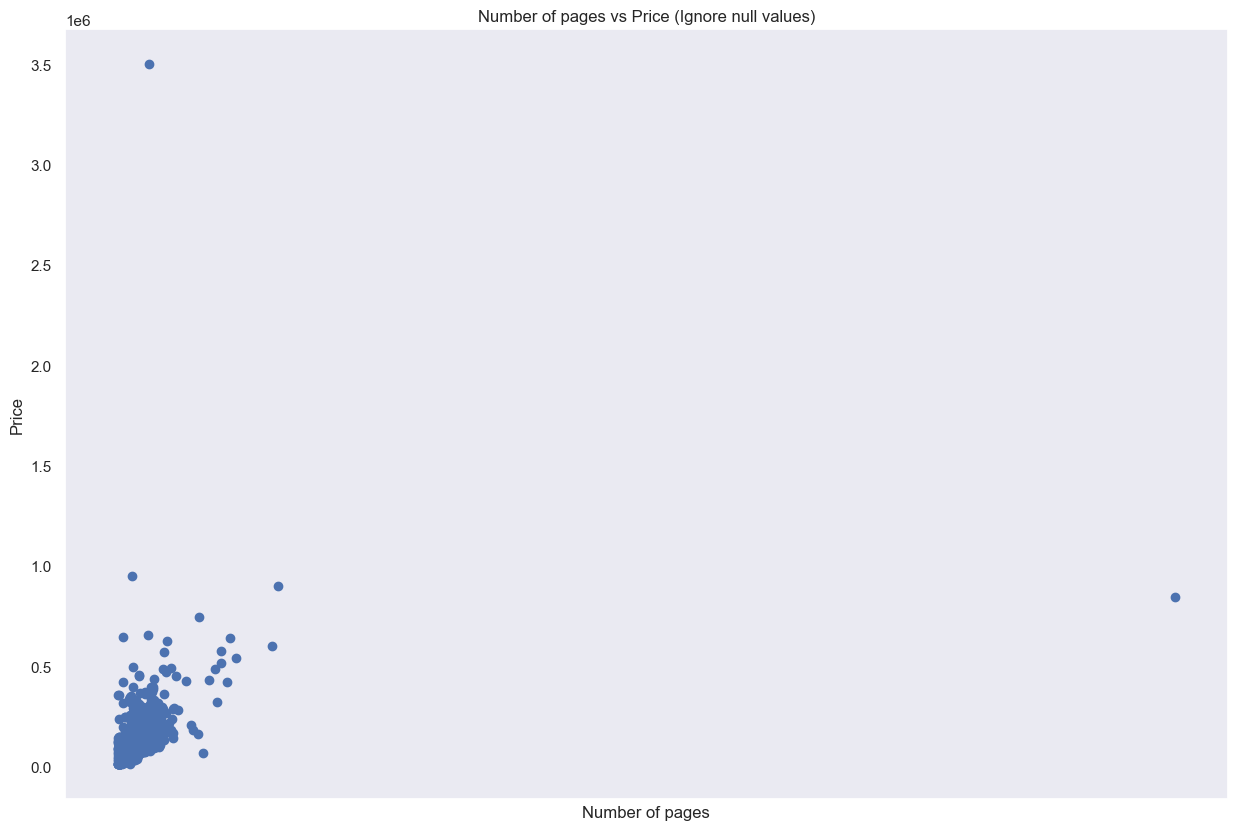

In [ ]:
# plot num_pages vs price (ignor null value first)
t1 = train[train.num_pages.isnull() == False]
plt.figure(figsize=(15, 10))
plt.scatter(x=t1.num_pages, y=t1.price)
plt.xlabel('Number of pages')
plt.ylabel('Price')
plt.title('Number of pages vs Price (Ignore null values)')
plt.xticks([])

Ta nhận thấy những cuốn sách dày hơn sẽ có xu hướng có giá thành cao hơn

## category

In [ ]:
train.category

261        sách văn học
746        truyện tranh
1380               sách
240        sách kinh tế
1644        sách tư duy
             ...       
1130       truyện tranh
1294       sách lịch sử
860        sách kinh tế
1459     sách chính trị
1126    sách tiếng việt
Name: category, Length: 1611, dtype: object

In [ ]:
# count null
train.category.isnull().sum()

0

Có thể thấy các thể loại sách rất đa dạng và cân bằng, không hề có thể loại nào chiếm đa số. Sách nhật bản là loại sách thông dụng thứ 2, cho thấy giới trẻ đang ngày càng bị wjbu hóa

Text(0.5, 1.0, 'Category vs Price')

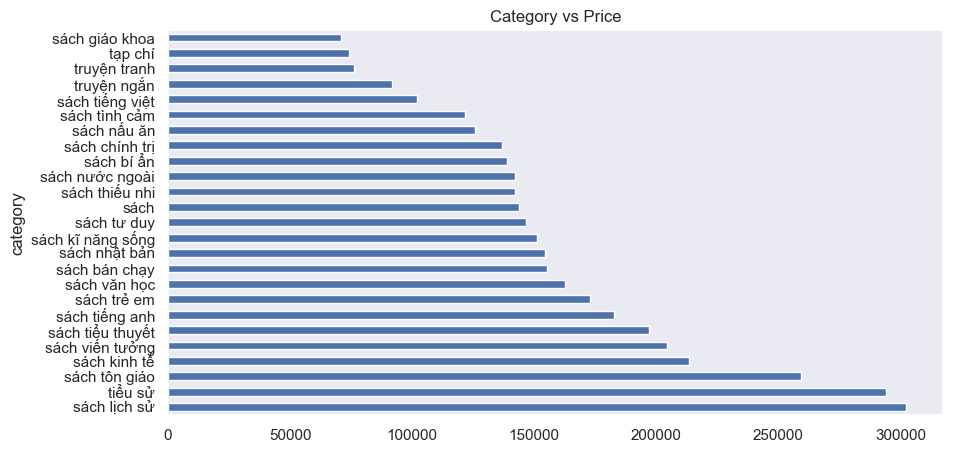

In [ ]:
# plot category vs price
plt.figure(figsize=(10, 5))
train.groupby('category').price.mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Category vs Price')

Text(0.5, 1.0, 'Category vs Number of pages')

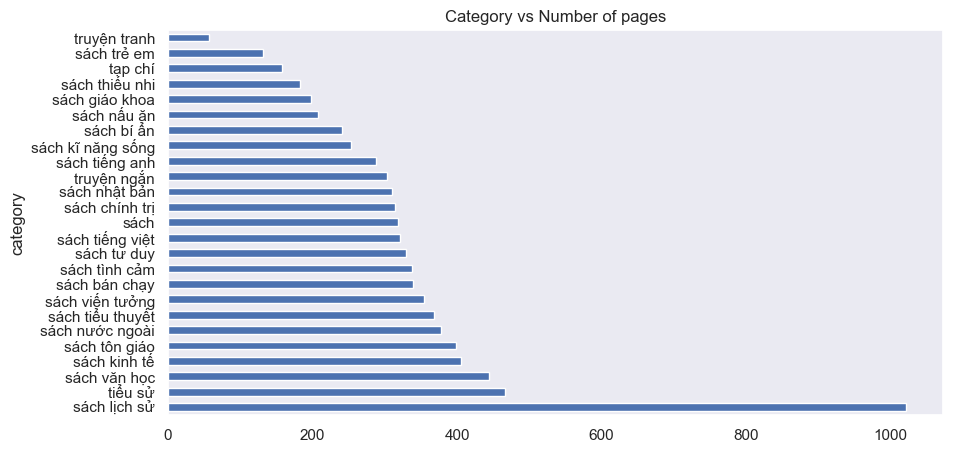

In [ ]:
# category vs num_pages
plt.figure(figsize=(10, 5))
train[train.num_pages.isnull() == False].groupby('category').num_pages.mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Category vs Number of pages')

Như vậy những loại sách có số trang nhiều nhất (lịch sử, tiểu sử, kinh tế, ...) thường có số trang nhiều nhất và cũng có giá cao nhất. Do đó số trang hay loại sách là những đặc trưng khá quan trọng để dự đoán giá thành

## price

Đây là trường thông tin mà ta cần dự đoán

In [ ]:
train.price

261     167860.0
746     108000.0
1380     97900.0
240     243800.0
1644     93000.0
          ...   
1130     39000.0
1294    577199.0
860     108000.0
1459    256750.0
1126    189000.0
Name: price, Length: 1611, dtype: float64

Text(0.5, 1.0, 'Price distribution')

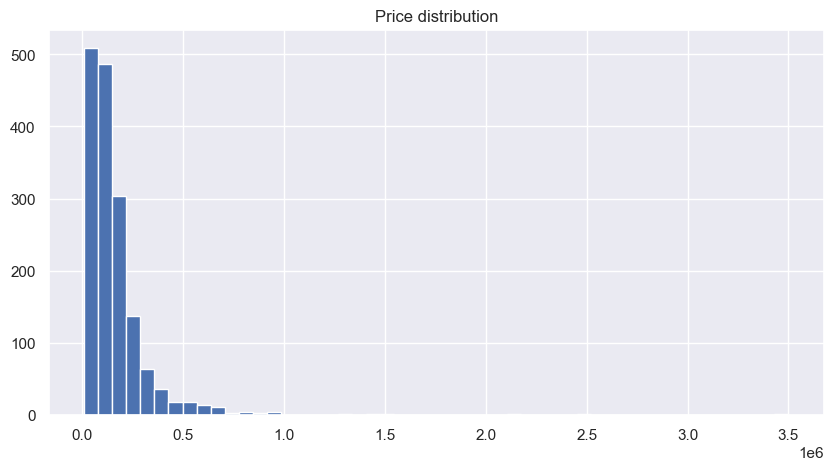

In [ ]:
# plot price distribution
plt.figure(figsize=(10, 5))
train.price.hist(bins=50)
plt.title('Price distribution')

In [ ]:
train.price.describe()

count    1.611000e+03
mean     1.581595e+05
std      1.799744e+05
min      8.600000e+03
25%      6.820000e+04
50%      1.190000e+05
75%      1.905000e+05
max      3.500000e+06
Name: price, dtype: float64

<AxesSubplot:>

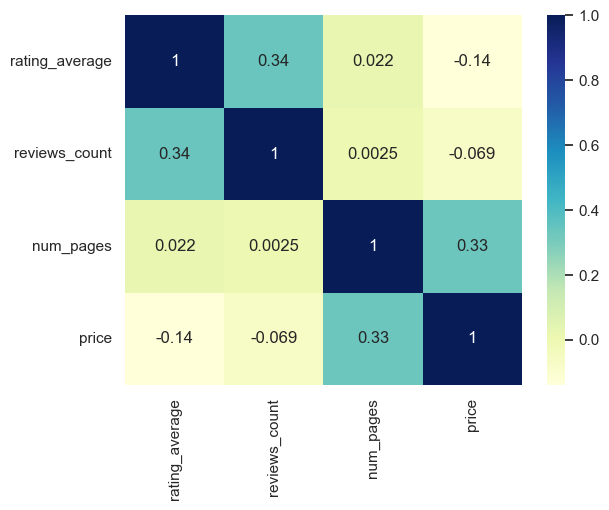

In [ ]:
sns.set(style="dark", color_codes=True)
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
